In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load the data
df = pd.read_csv('/kaggle/input/beauty-product-sale/dataset_16_Beauty Products Sales.csv')

output = []  # List to store output results
output.append("Exploratory Data Analysis of Home Cleaning Services\n")
output.append("====================================\n")
print(df.head())

         Date     Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-12-10  Fragrances  South       Regular         7   70.16      0.14   
1  2024-06-06    Skincare   West       Premium        37   65.77      0.05   
2  2024-07-15    Haircare  North       Premium        44  159.36      0.03   
3  2024-12-28  Fragrances  North       Premium         7  166.28      0.19   
4  2024-01-09      Makeup  South       Premium         3   50.43      0.17   

   Revenue  
0   422.36  
1  2311.82  
2  6801.48  
3   942.81  
4   125.57  


In [3]:
#Explore the data

print(df.head())  # Display the first few rows
output.append(f"First few rows:\n{df.head()}\n")

         Date     Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-12-10  Fragrances  South       Regular         7   70.16      0.14   
1  2024-06-06    Skincare   West       Premium        37   65.77      0.05   
2  2024-07-15    Haircare  North       Premium        44  159.36      0.03   
3  2024-12-28  Fragrances  North       Premium         7  166.28      0.19   
4  2024-01-09      Makeup  South       Premium         3   50.43      0.17   

   Revenue  
0   422.36  
1  2311.82  
2  6801.48  
3   942.81  
4   125.57  


In [4]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [5]:
print(df.describe()) # Summary statistics
output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity        Price     Discount      Revenue
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     25.836000   102.911800     0.144150  2274.898790
std      14.457182    55.894409     0.087608  1913.973757
min       1.000000     5.030000     0.000000     3.670000
25%      13.000000    54.485000     0.070000   698.655000
50%      26.000000   103.750000     0.140000  1736.410000
75%      38.000000   151.107500     0.220000  3369.462500
max      50.000000   199.870000     0.300000  8994.140000


In [6]:
# Clean the data

output.append("Data Cleaning Results:\n")
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")

# Fill or drop missing values as necessary
df.dropna(inplace=True)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [11]:
# Check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

In [12]:
# Total revenue from cleaning services
total_revenue = df['Price'].sum()
output.append(f'Total Revenue: TK{total_revenue}\n')
print(f'Total Revenue: TK{total_revenue}')

Total Revenue: TK102911.79999999999


In [13]:
# average price per Customer_Type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)

Customer_Type
Premium    102.316175
Regular    103.599849
Name: Price, dtype: float64


In [14]:
# Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)

Region
South    280
West     256
North    237
East     227
Name: count, dtype: int64


In [15]:
# Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     22450.46
North    24603.93
South    29604.83
West     26252.58
Name: Price, dtype: float64


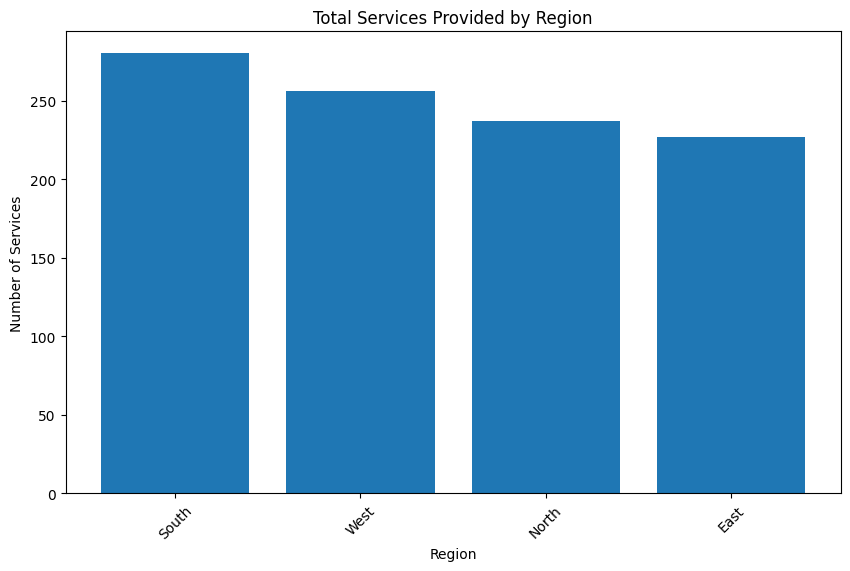

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')  # Save the figure
plt.show()

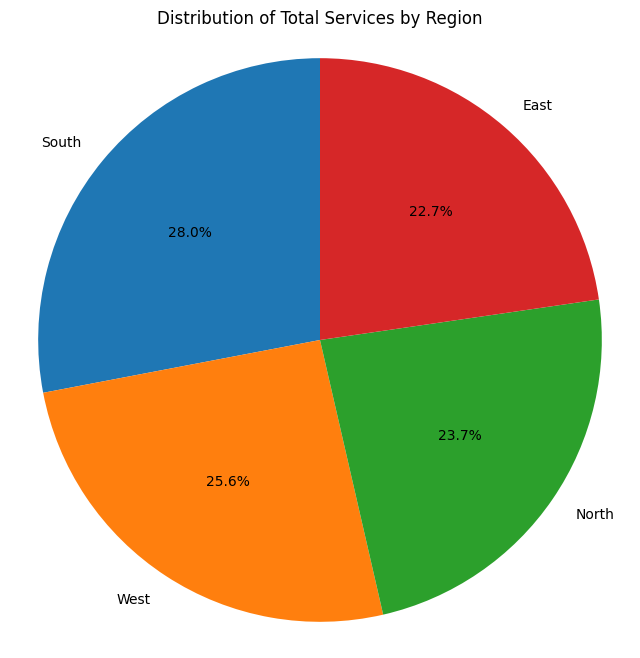

In [17]:
# Pie chart for total services by region
plt.figure(figsize=(8, 8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Services by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig('services_distribution_by_region.png')  # Save the figure
plt.show()

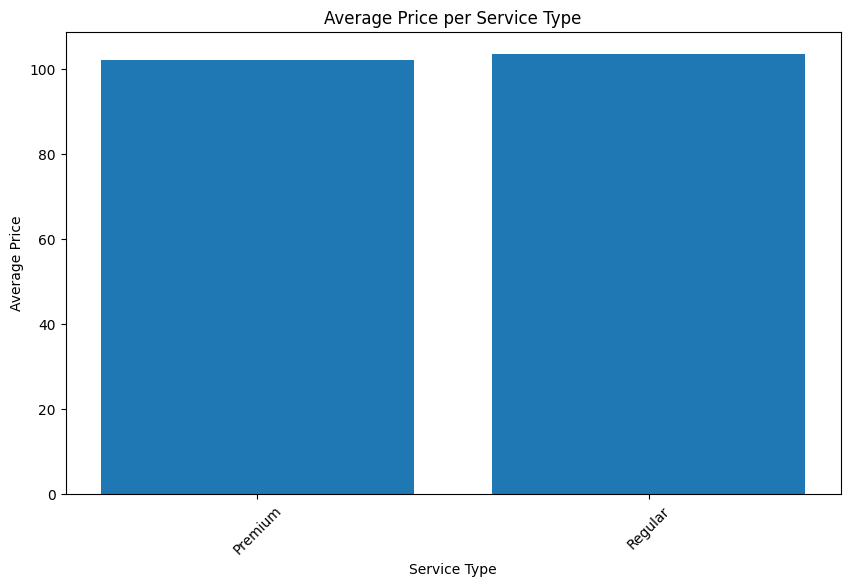

In [18]:
# Bar plot of average price per service type
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  # Save the figure
plt.show()

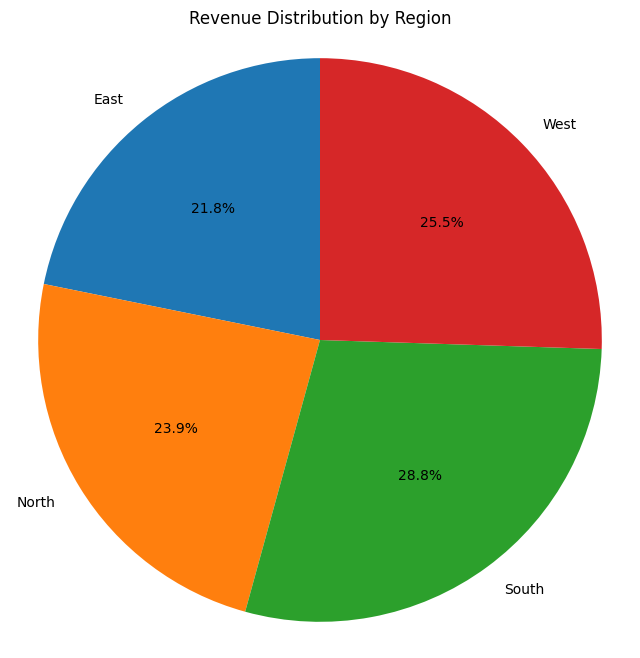

In [19]:
# Pie chart for revenue by service type
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig('revenue_distribution_by_region.png')  # Save the figure
plt.show()


In [22]:
# Save output to a text file
with open('analysis_output.txt', 'w') as f:
    f.writelines(output)